In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic = pd.read_csv('tested.csv')

In [3]:
print(titanic.head(50))

    PassengerId  Survived  Pclass  \
0           892         0       3   
1           893         1       3   
2           894         0       2   
3           895         0       3   
4           896         1       3   
5           897         0       3   
6           898         1       3   
7           899         0       2   
8           900         1       3   
9           901         0       3   
10          902         0       3   
11          903         0       1   
12          904         1       1   
13          905         0       2   
14          906         1       1   
15          907         1       2   
16          908         0       2   
17          909         0       3   
18          910         1       3   
19          911         1       3   
20          912         0       1   
21          913         0       3   
22          914         1       1   
23          915         0       1   
24          916         1       1   
25          917         0       3   
2

In [4]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [5]:
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)

In [6]:
titanic['Fare'].fillna(titanic['Fare'].mode(), inplace=True)

In [7]:
titanic.drop(columns=['Cabin'], inplace=True)

In [8]:
# Drop rows with missing values in Fare
titanic.dropna(subset=['Fare'], inplace=True)

In [9]:
titanic.head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,C
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,S


In [10]:
# Label Encoding for columns that are categorical
from sklearn.preprocessing import LabelEncoder
LbEn = LabelEncoder()
titanic['Sex'] = LbEn.fit_transform(titanic['Sex'])  # Male = 1, Female = 0
titanic['Embarked'] = LbEn.fit_transform(titanic['Embarked'])  # C = 0, Q = 1, S = 2


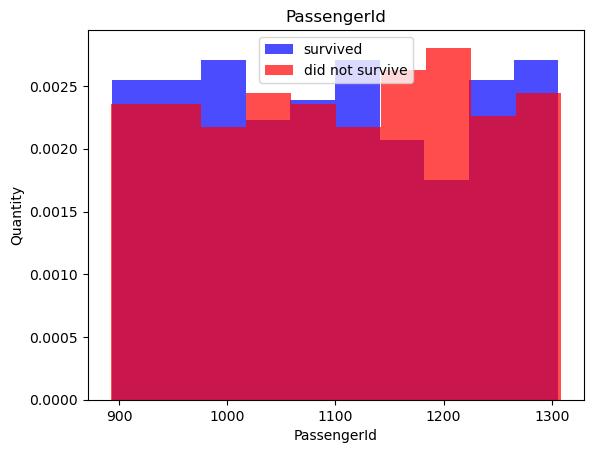

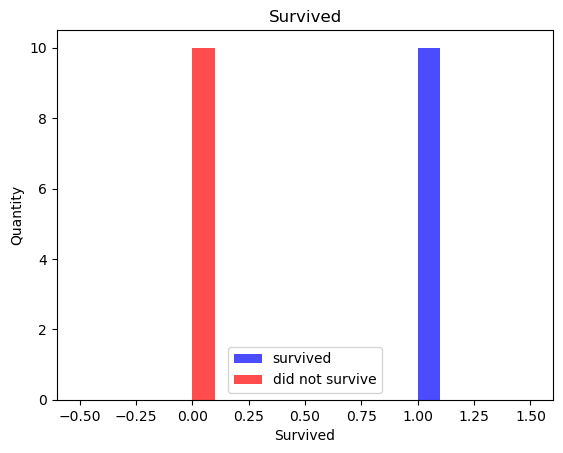

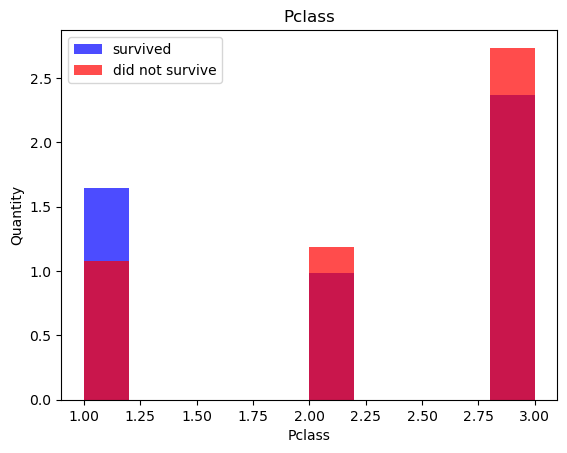

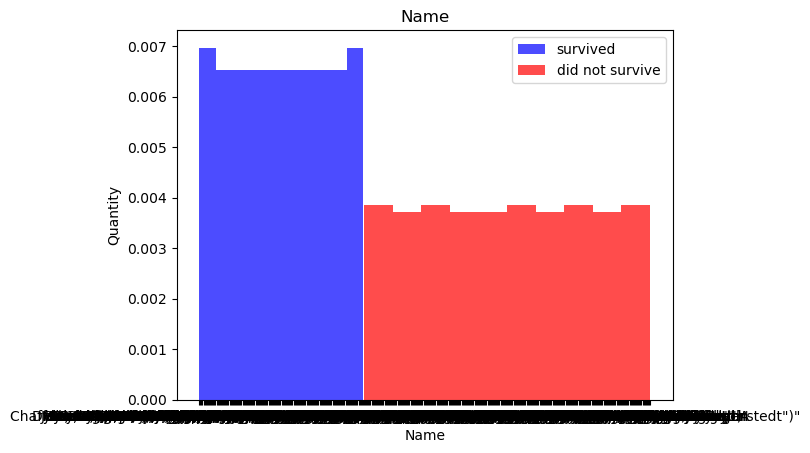

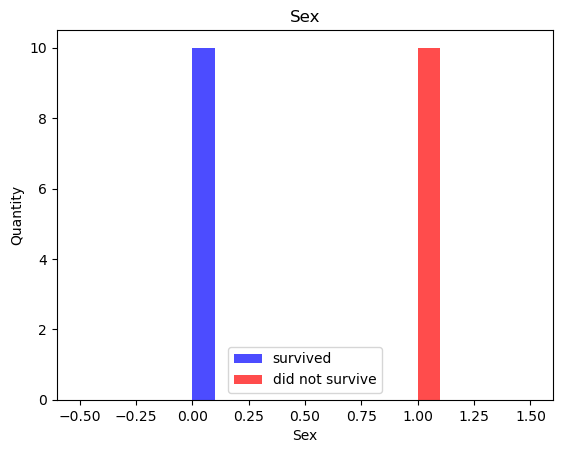

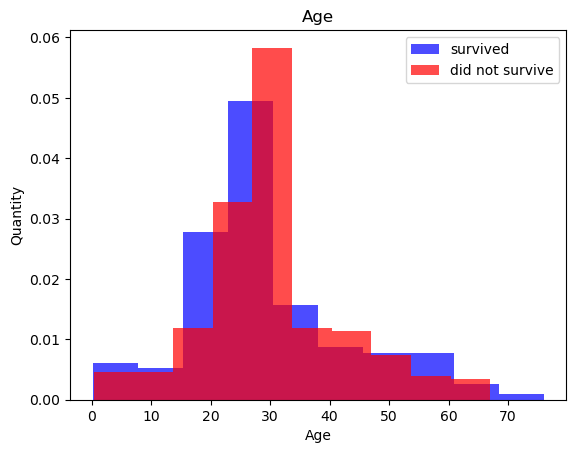

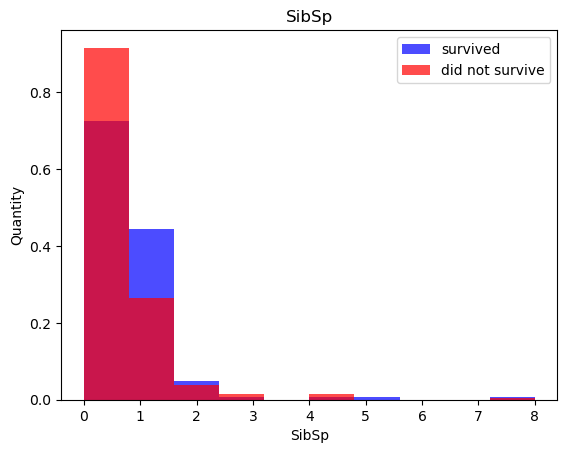

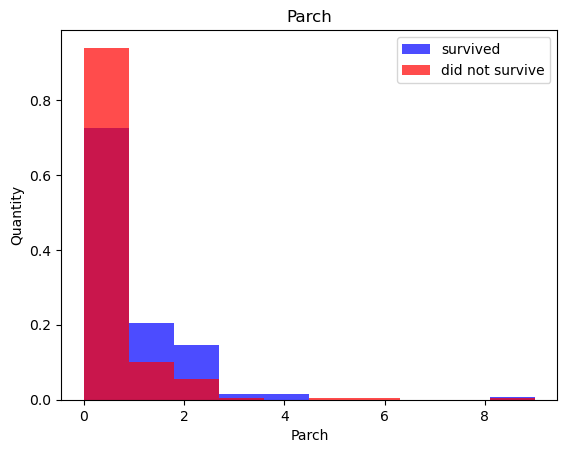

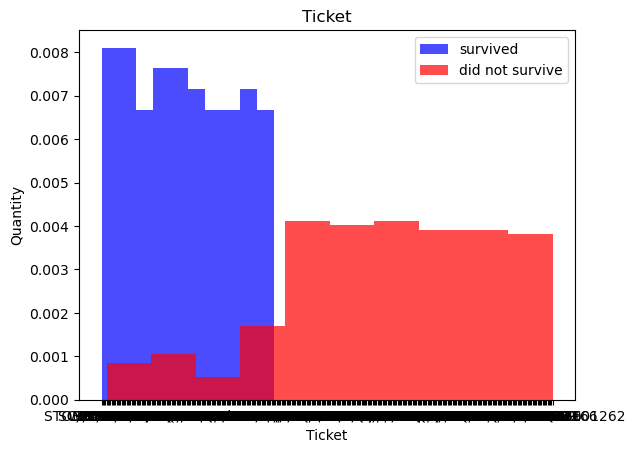

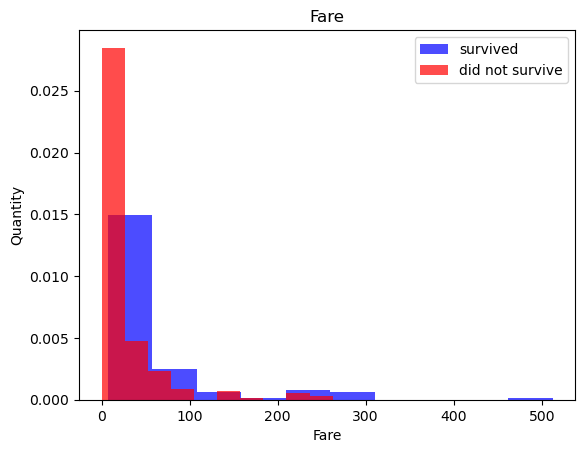

In [11]:
for label in titanic.columns[:-1]:
    plt.hist(titanic[titanic['Survived']==1][label], color='blue', label='survived', alpha=0.7, density=True)
    plt.hist(titanic[titanic['Survived']==0][label], color='red', label='did not survive', alpha=0.7, density=True)
    plt.title(label)
    plt.ylabel("Quantity")
    plt.xlabel(label)
    plt.legend()
    plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

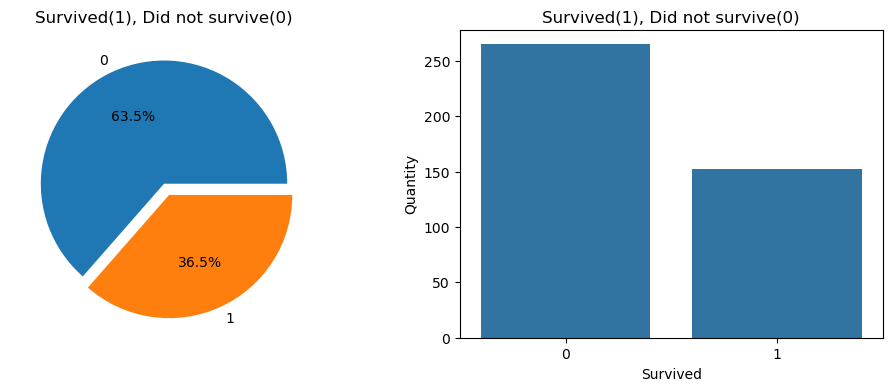

In [12]:
f, ax = plt.subplots(1,2, figsize=(12,4))
titanic['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax=ax[0], shadow=False)
ax[0].set_title('Survived(1), Did not survive(0)')
ax[0].set_ylabel('')
sns.countplot(x='Survived', data=titanic, ax=ax[1])
ax[1].set_title('Survived(1), Did not survive(0)')
ax[1].set_ylabel('Quantity')
plt.show

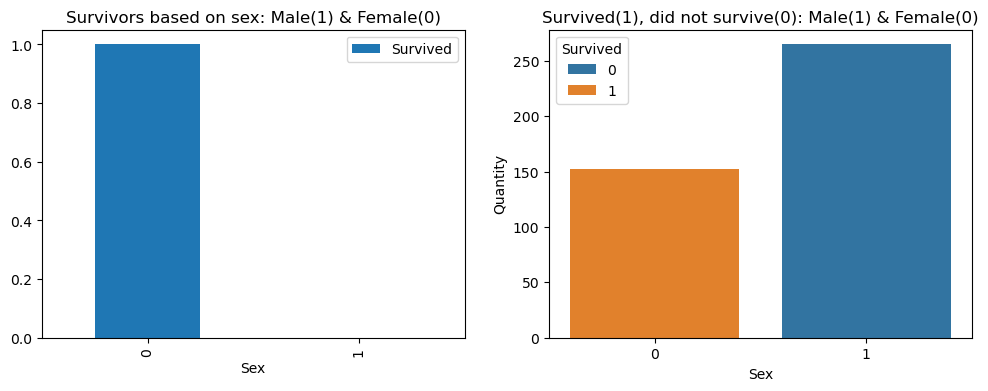

In [13]:
f, ax=plt.subplots(1,2, figsize=(12, 4))
titanic[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survivors based on sex: Male(1) & Female(0)')
sns.countplot(x='Sex', hue='Survived', data=titanic, ax=ax[1])
ax[1].set_title('Survived(1), did not survive(0): Male(1) & Female(0)')
ax[1].set_ylabel('Quantity')
plt.show()


In [14]:
# Feature Engineering
# Selecting features and target variables
X= titanic[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y= titanic['Survived']

In [15]:
# Splitting dataset into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)


In [16]:
# Standardizing the features
from sklearn.preprocessing import StandardScaler
SScaler= StandardScaler()
X_train = SScaler.fit_transform(X_train)
X_test = SScaler.transform(X_test)

In [17]:
# 1. Multinomial Logistic Regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)
log_reg.fit(X_train, y_train)


LogisticRegression(max_iter=200, multi_class='multinomial')

In [18]:
# Predictions
y_pred_logreg = log_reg.predict(X_test)

In [19]:
# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))
print("Classification Report:\n", classification_report(y_test, y_pred_logreg))

Logistic Regression Accuracy: 1.0
Confusion Matrix:
 [[50  0]
 [ 0 34]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



In [20]:
# 2. Multinomial Naive Bayes
# Naive Bayes doesn't work well with negative values, so we adjust the data to be non-negative.
from sklearn.naive_bayes import MultinomialNB
X_train_nb = X_train - X_train.min()
X_test_nb = X_test - X_test.min()

In [21]:
nb = MultinomialNB()
nb.fit(X_train_nb, y_train)

MultinomialNB()

In [22]:
# Predictions
y_pred_nb = nb.predict(X_test_nb)

In [23]:
# Evaluate the model
print("Multinomial Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
print("Classification Report:\n", classification_report(y_test, y_pred_nb))

Multinomial Naive Bayes Accuracy: 0.8928571428571429
Confusion Matrix:
 [[50  0]
 [ 9 25]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92        50
           1       1.00      0.74      0.85        34

    accuracy                           0.89        84
   macro avg       0.92      0.87      0.88        84
weighted avg       0.91      0.89      0.89        84



In [24]:
# 3. Support Vector Machine
from sklearn.svm import SVC
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

In [25]:
# Prediction
y_pred_svm = svm_model.predict(X_test)


In [26]:
# Evaluate the model
print("Support Vector Machine Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

Support Vector Machine Accuracy: 0.9642857142857143
Confusion Matrix:
 [[50  0]
 [ 3 31]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        50
           1       1.00      0.91      0.95        34

    accuracy                           0.96        84
   macro avg       0.97      0.96      0.96        84
weighted avg       0.97      0.96      0.96        84



In [27]:
# 4. Neaural net for classification
import tensorflow as tf

In [63]:
def plot_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
    ax1.plot(history.history['loss'], label='loss')
    ax1.plot(history.history['val_loss'], label='val_loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Binary crossentropy')
    ax1.grid(True)
    
    ax2.plot(history.history['accuracy'], label='accuracy')
    ax2.plot(history.history['val_accuracy'], label='val_accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.grid(True)
    
    plt.show()
    

In [53]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
 nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(7,)),
    tf.keras.layers.Dropout(dropout_prob),
    tf.keras.layers.Dense(num_nodes, activation='relu'),
    tf.keras.layers.Dropout(dropout_prob),
    tf.keras.layers.Dense(1, activation='sigmoid')# we use sigmoid to get 0 and 1 projections similar to logistic regression    
 ])

 nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy', 
                metrics=['accuracy'])  
 history = nn_model.fit(
 X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0
 ) 
 return nn_model, history

16 nodes, dropout 0, lr 0.01, batch size 32


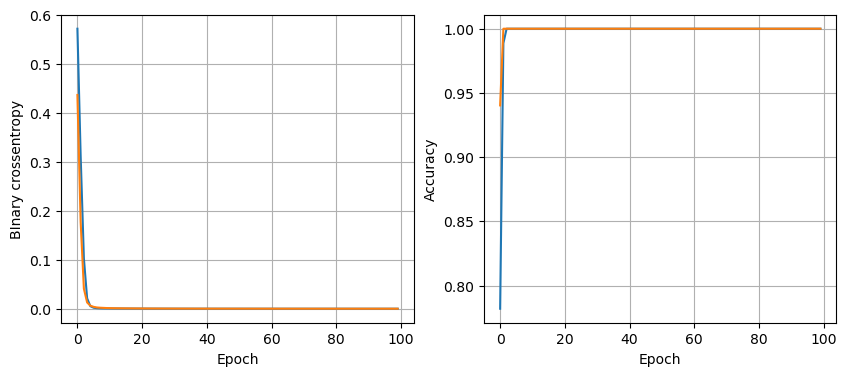

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 1.6935e-05 
16 nodes, dropout 0, lr 0.01, batch size 64


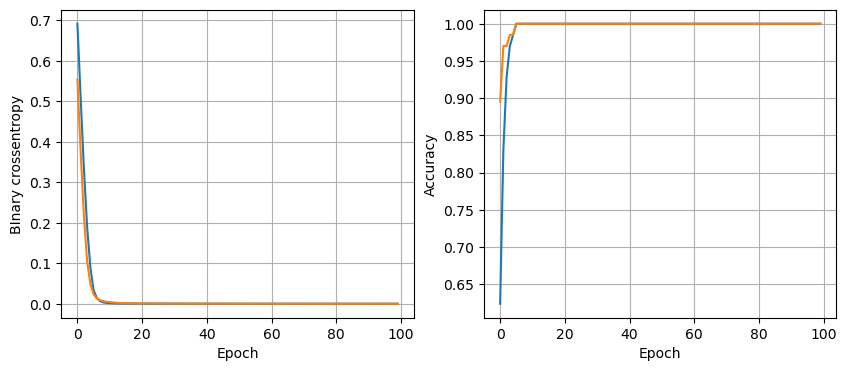

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 3.4098e-05 
16 nodes, dropout 0, lr 0.01, batch size 128


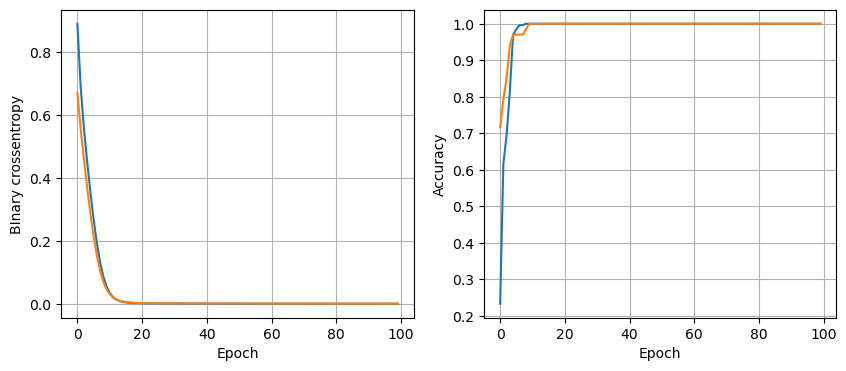

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 1.3243e-04 
16 nodes, dropout 0, lr 0.005, batch size 32


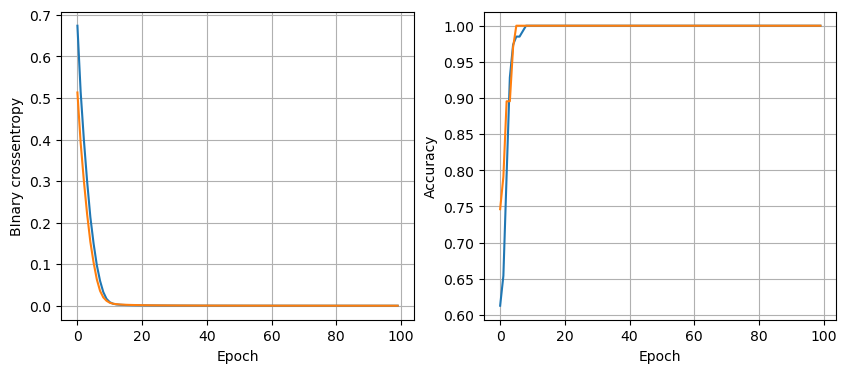

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 3.7542e-05 
16 nodes, dropout 0, lr 0.005, batch size 64


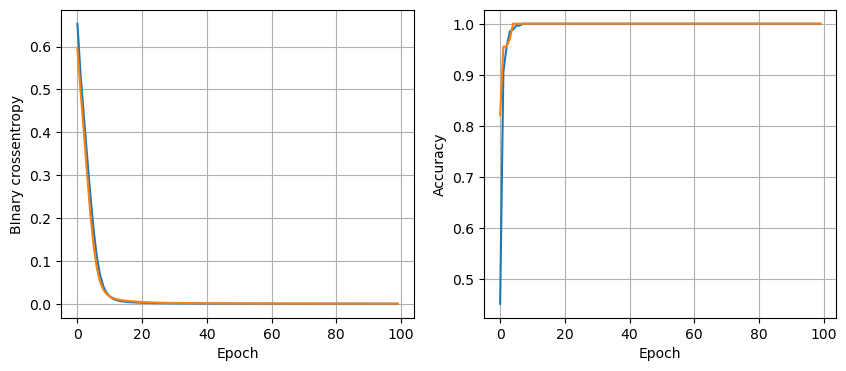

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 1.3509e-04 
16 nodes, dropout 0, lr 0.005, batch size 128


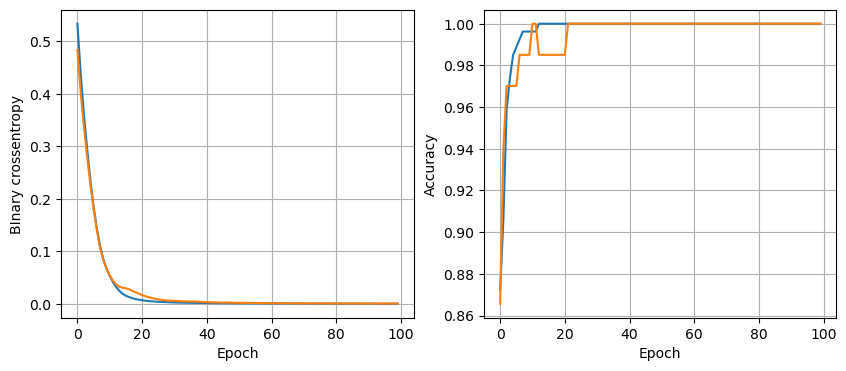

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 3.1049e-04 
16 nodes, dropout 0, lr 0.001, batch size 32


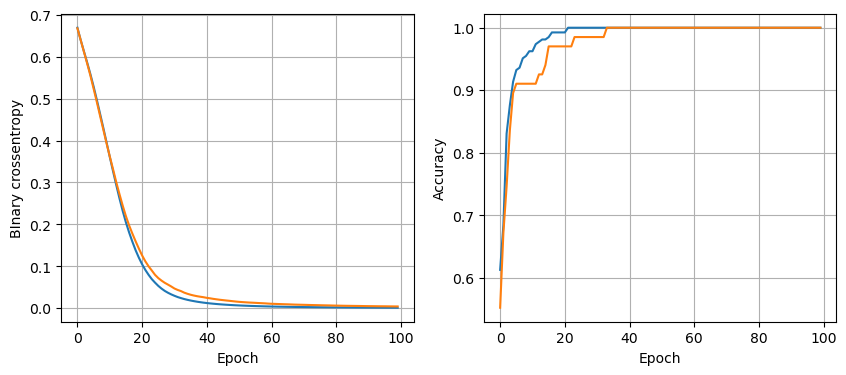

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 953us/step - accuracy: 1.0000 - loss: 0.0014
16 nodes, dropout 0, lr 0.001, batch size 64


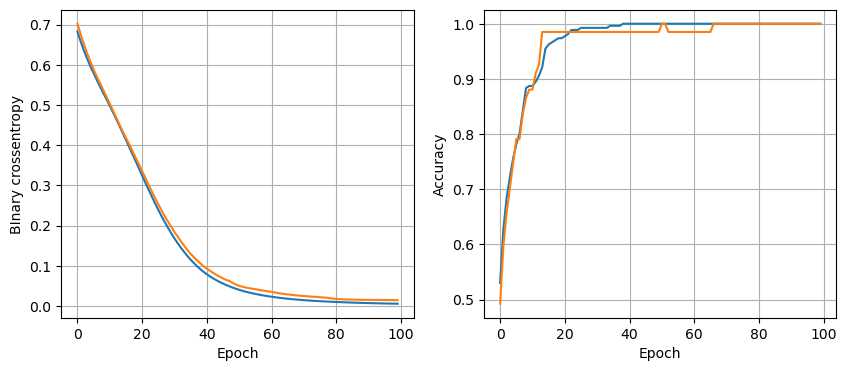

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0057 
16 nodes, dropout 0, lr 0.001, batch size 128


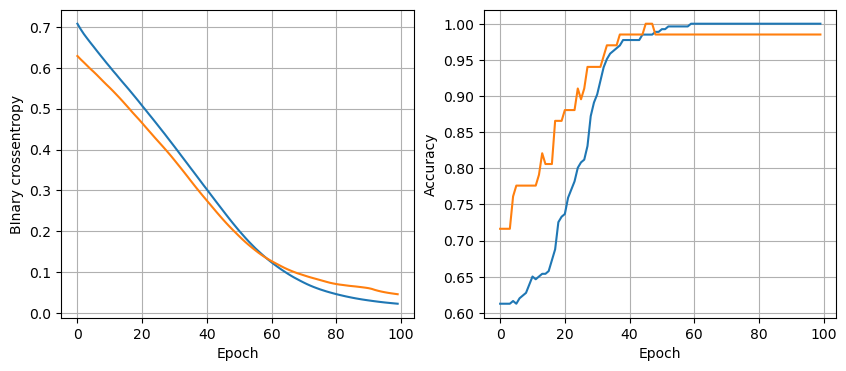

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9992 - loss: 0.0233 
16 nodes, dropout 0.2, lr 0.01, batch size 32


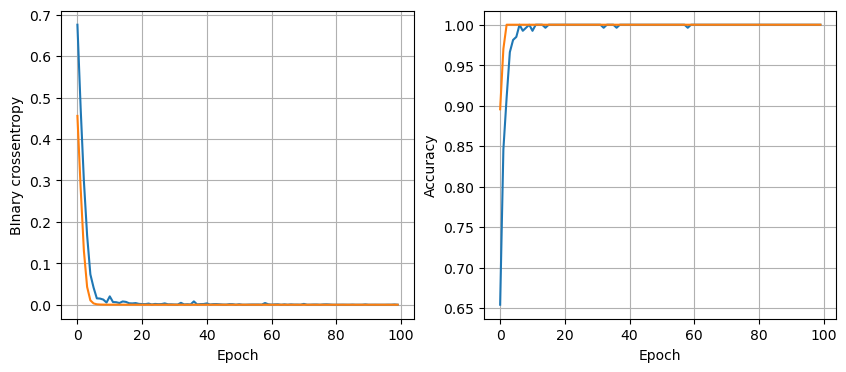

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 5.2033e-09 
16 nodes, dropout 0.2, lr 0.01, batch size 64


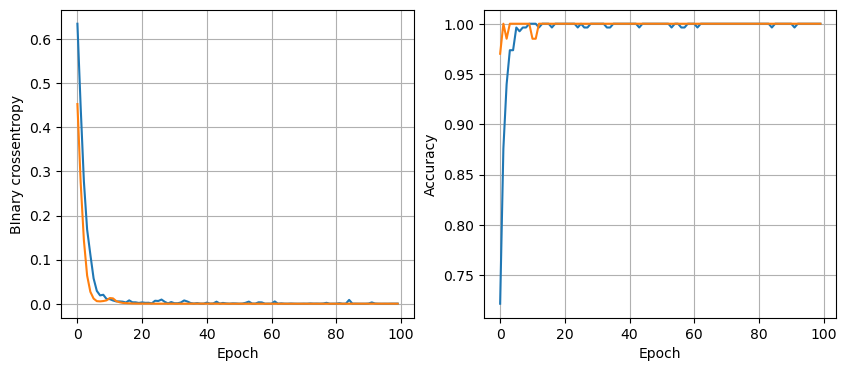

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 4.1945e-06 
16 nodes, dropout 0.2, lr 0.01, batch size 128


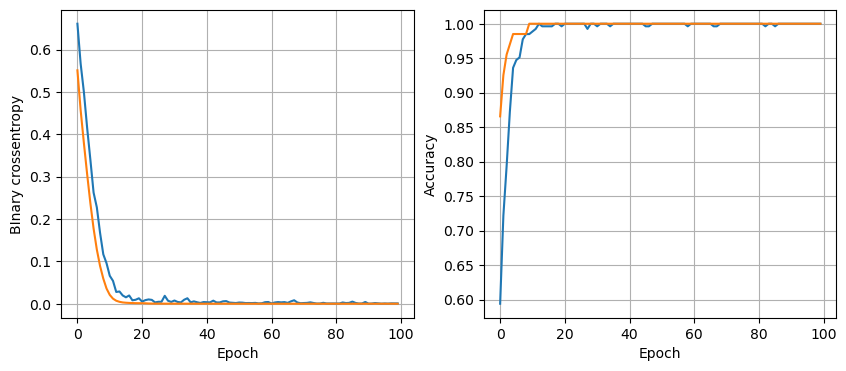

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 2.2354e-06 
16 nodes, dropout 0.2, lr 0.005, batch size 32


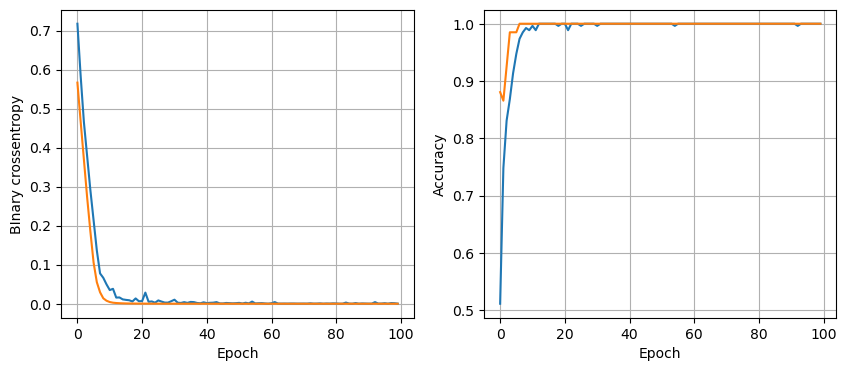

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 3.6347e-07 
16 nodes, dropout 0.2, lr 0.005, batch size 64


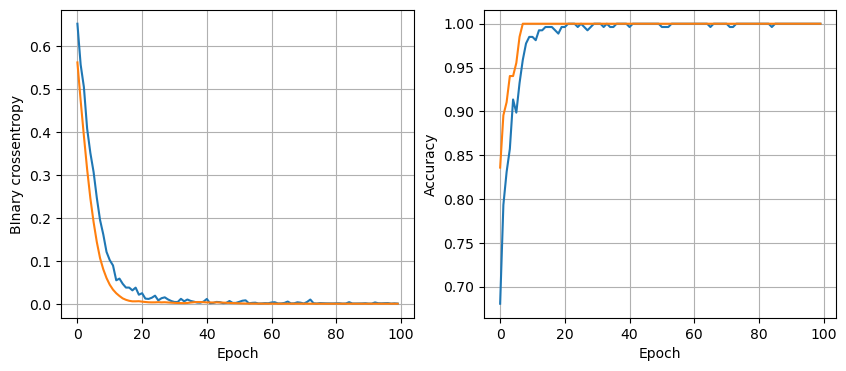

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 2.4796e-06 
16 nodes, dropout 0.2, lr 0.005, batch size 128


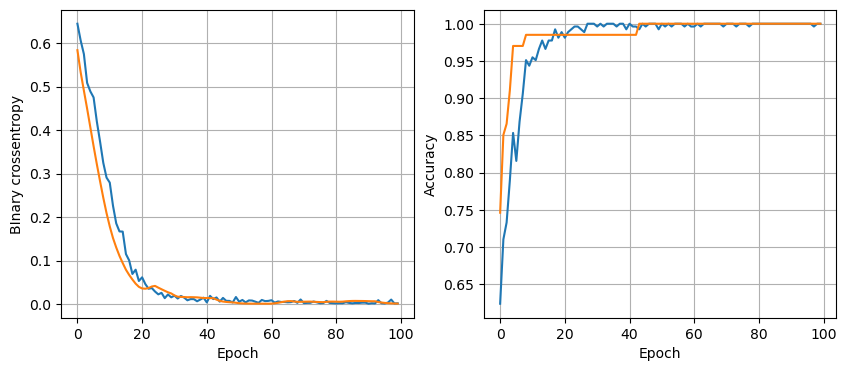

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 6.5219e-05 
16 nodes, dropout 0.2, lr 0.001, batch size 32


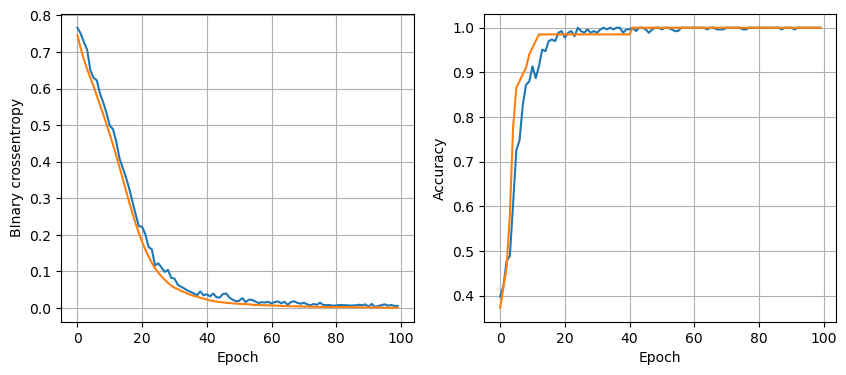

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.4172e-04 
16 nodes, dropout 0.2, lr 0.001, batch size 64


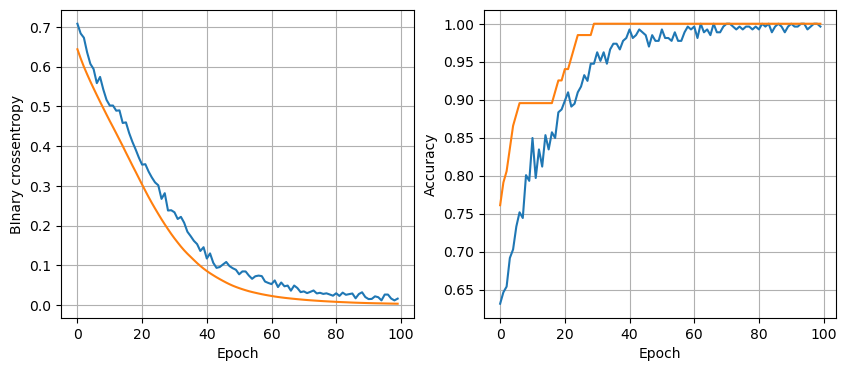

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0031 
16 nodes, dropout 0.2, lr 0.001, batch size 128


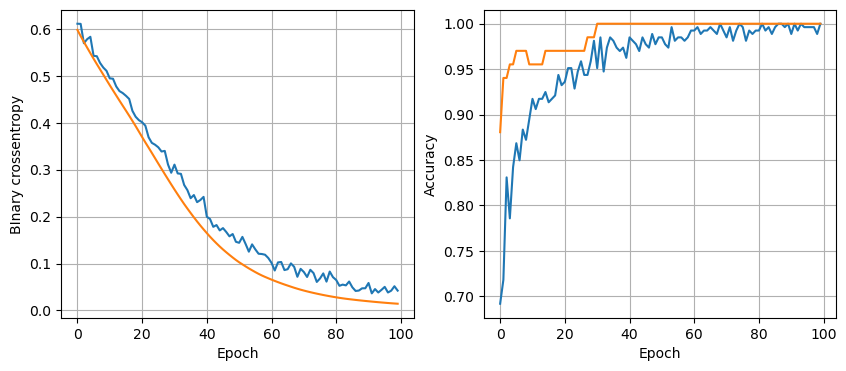

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0118 
32 nodes, dropout 0, lr 0.01, batch size 32


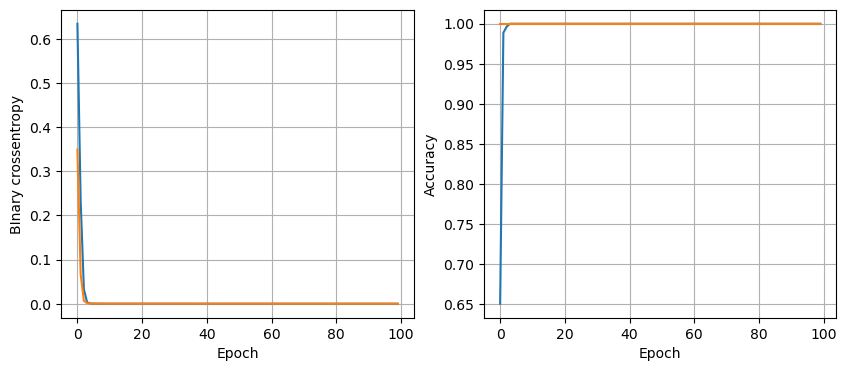

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 5.9296e-06 
32 nodes, dropout 0, lr 0.01, batch size 64


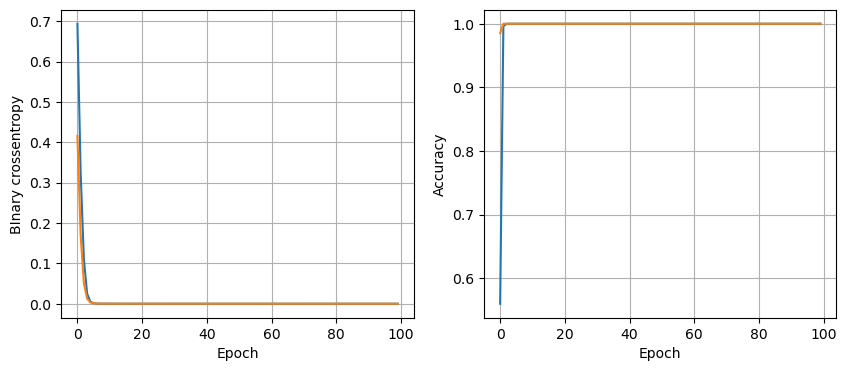

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 1.3375e-05 
32 nodes, dropout 0, lr 0.01, batch size 128


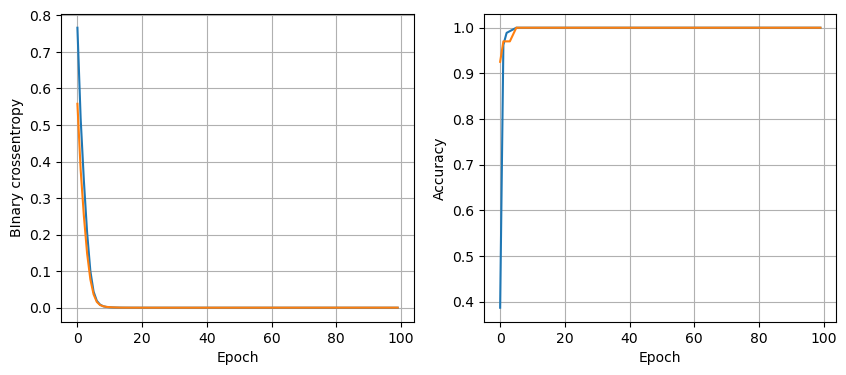

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 3.0071e-05 
32 nodes, dropout 0, lr 0.005, batch size 32


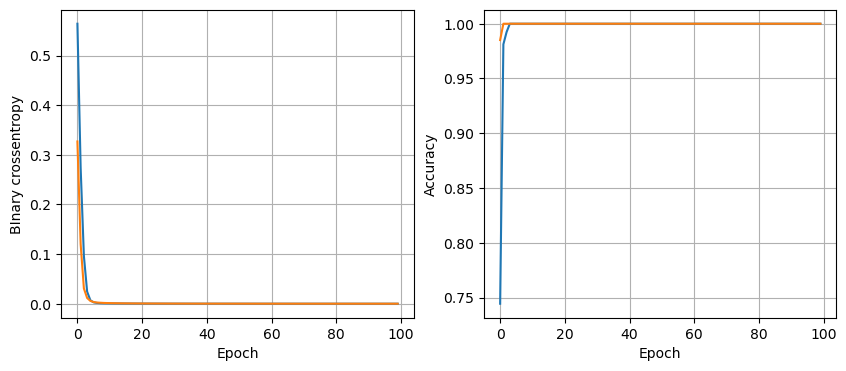

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 1.8234e-05 
32 nodes, dropout 0, lr 0.005, batch size 64


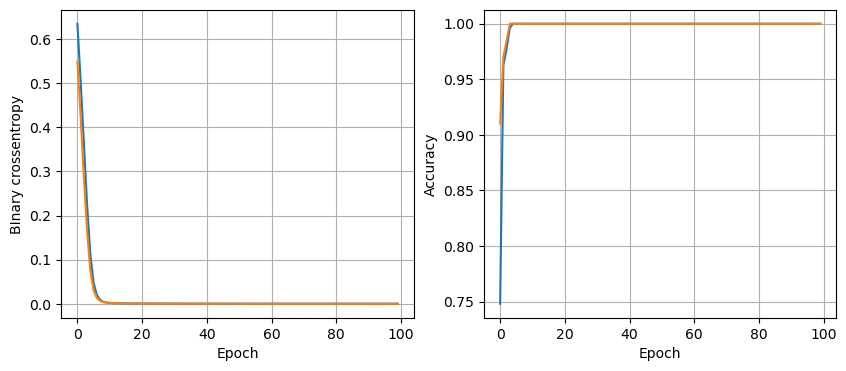

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.3866e-05 
32 nodes, dropout 0, lr 0.005, batch size 128


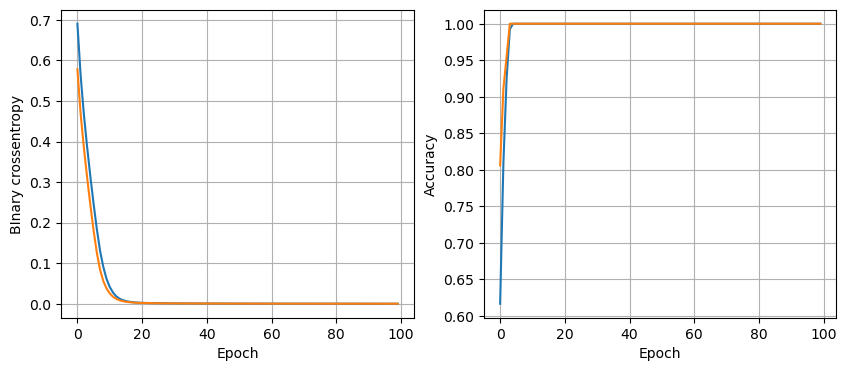

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 1.6459e-04 
32 nodes, dropout 0, lr 0.001, batch size 32


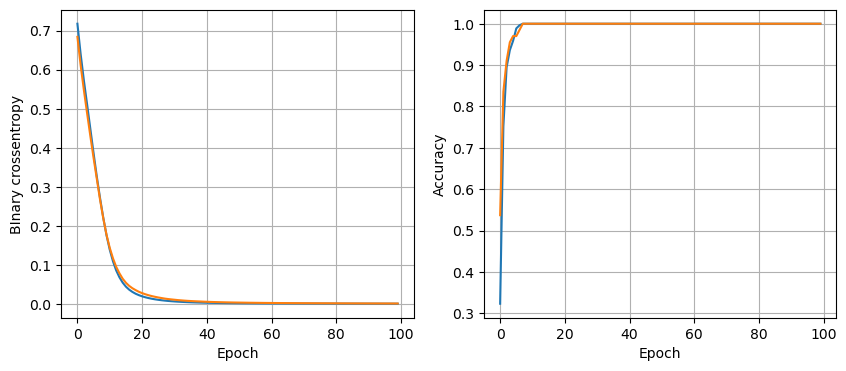

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 3.2134e-04 
32 nodes, dropout 0, lr 0.001, batch size 64


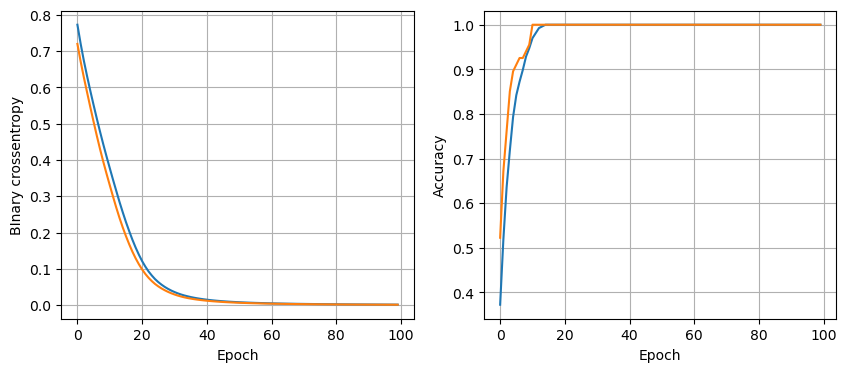

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0014 
32 nodes, dropout 0, lr 0.001, batch size 128


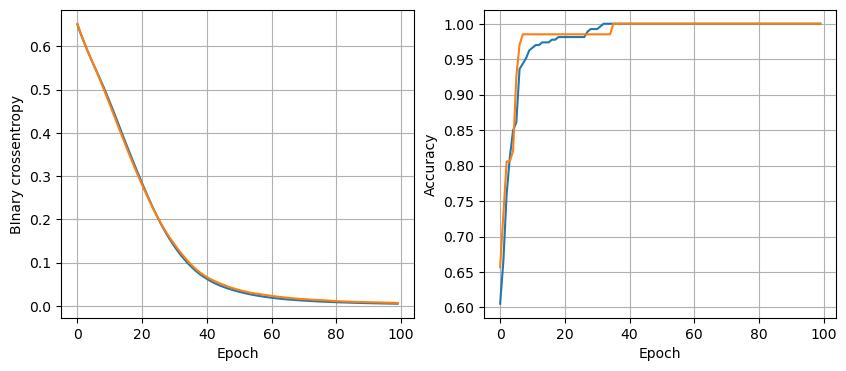

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0050 
32 nodes, dropout 0.2, lr 0.01, batch size 32


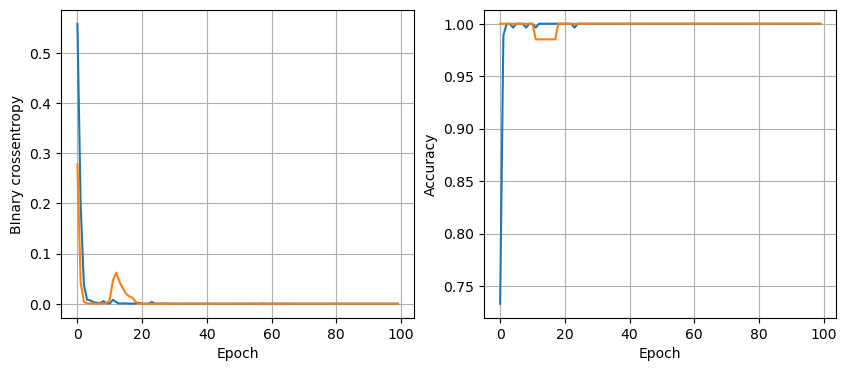

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 6.4149e-08 
32 nodes, dropout 0.2, lr 0.01, batch size 64


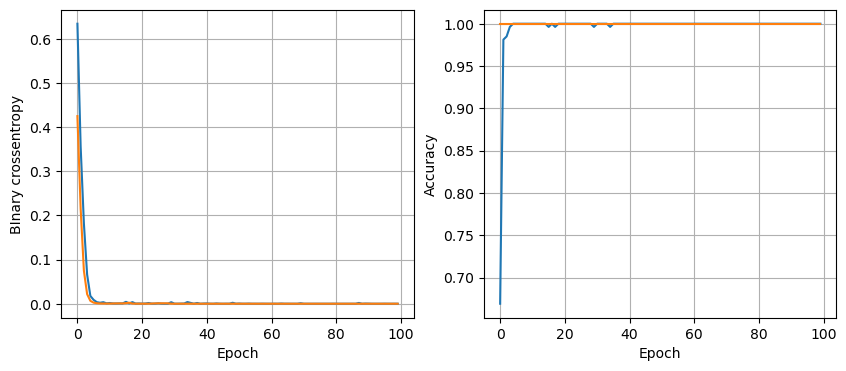

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 3.1589e-07 
32 nodes, dropout 0.2, lr 0.01, batch size 128


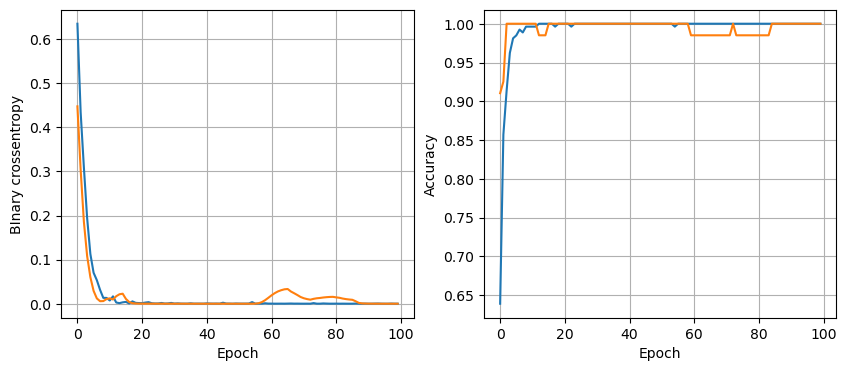

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 3.3352e-06 
32 nodes, dropout 0.2, lr 0.005, batch size 32


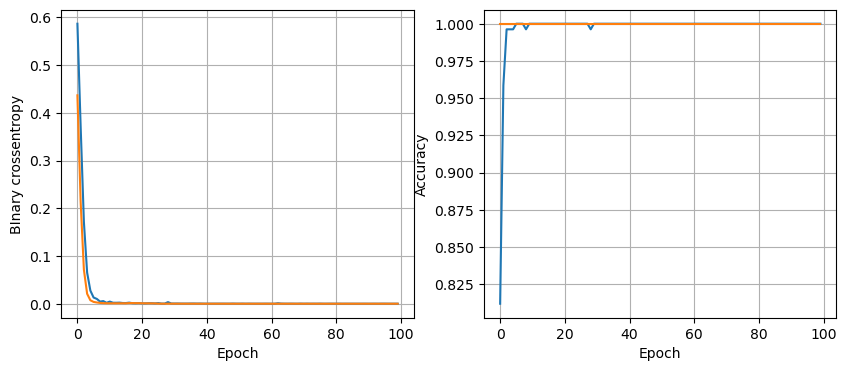

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 9.8591e-07 
32 nodes, dropout 0.2, lr 0.005, batch size 64


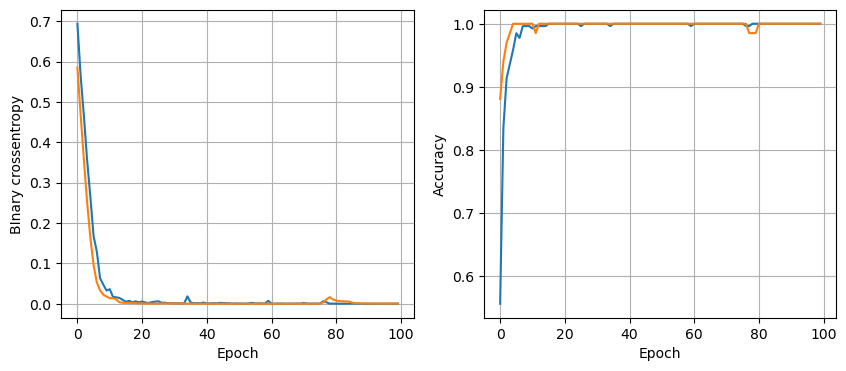

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 3.2060e-05 
32 nodes, dropout 0.2, lr 0.005, batch size 128


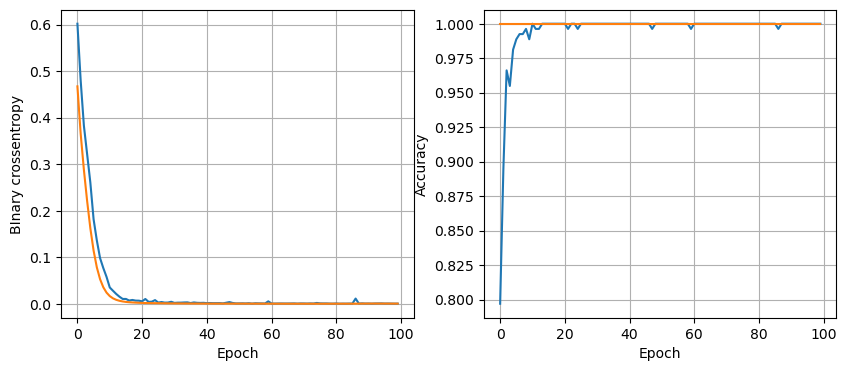

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 3.3511e-05 
32 nodes, dropout 0.2, lr 0.001, batch size 32


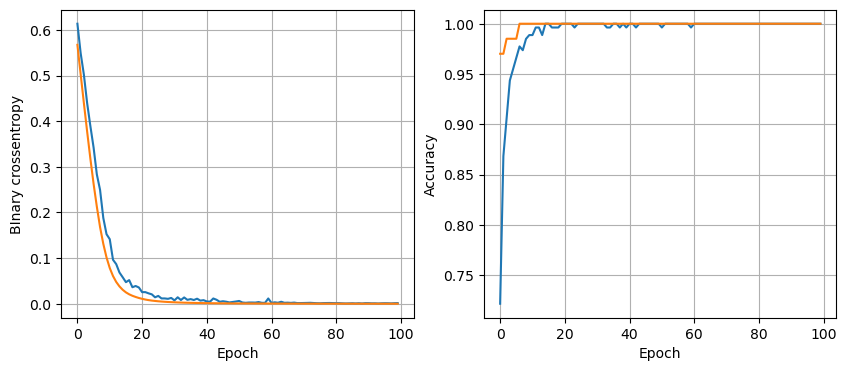

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 9.1687e-05 
32 nodes, dropout 0.2, lr 0.001, batch size 64


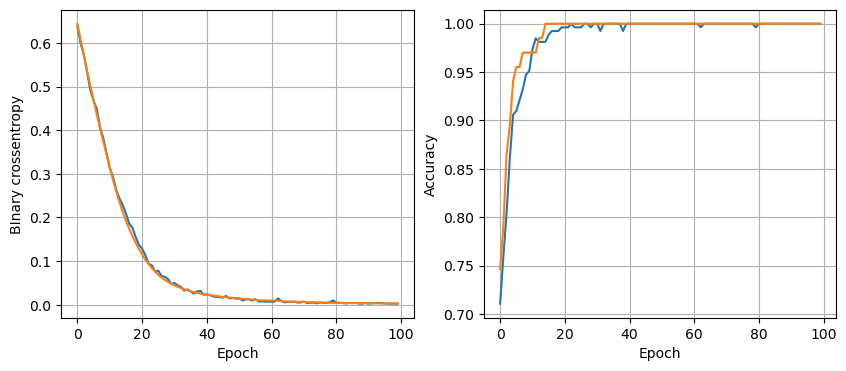

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 6.1782e-04 
32 nodes, dropout 0.2, lr 0.001, batch size 128


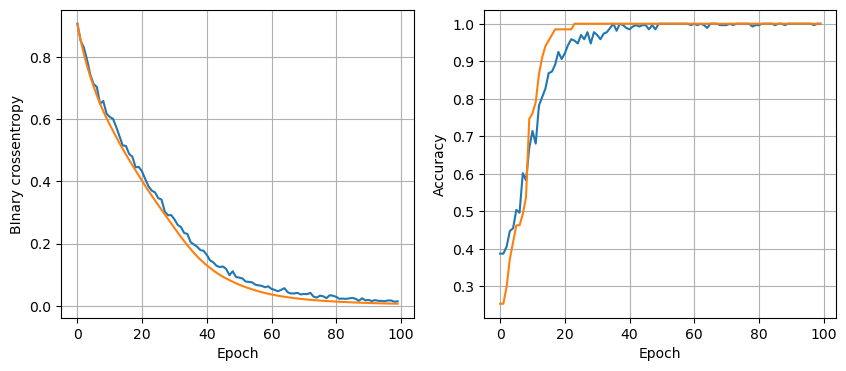

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0056 
64 nodes, dropout 0, lr 0.01, batch size 32


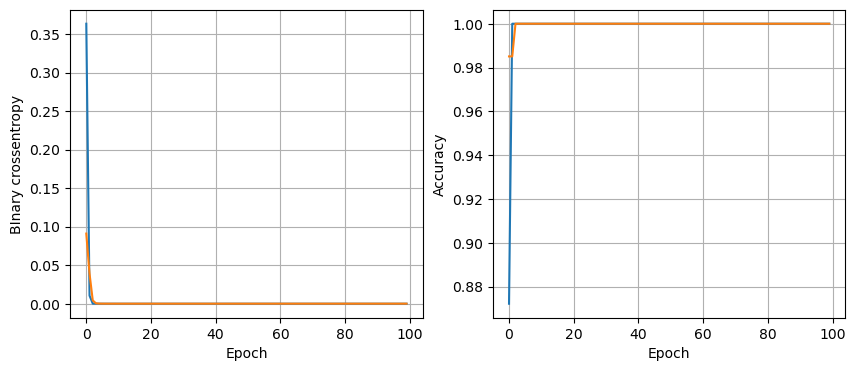

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 4.6283e-06 
64 nodes, dropout 0, lr 0.01, batch size 64


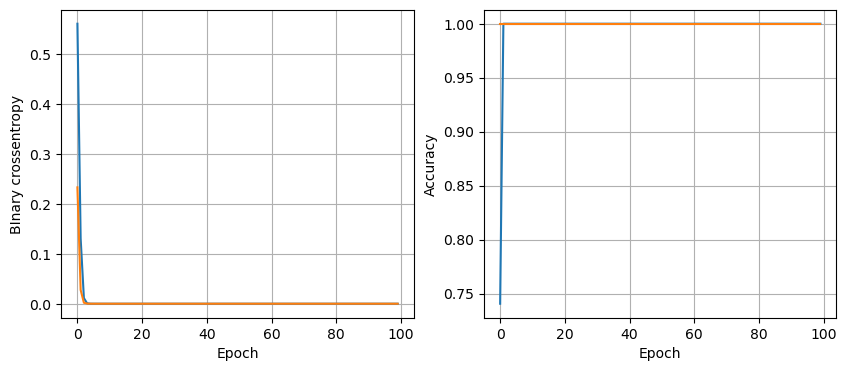

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 1.1308e-06 
64 nodes, dropout 0, lr 0.01, batch size 128


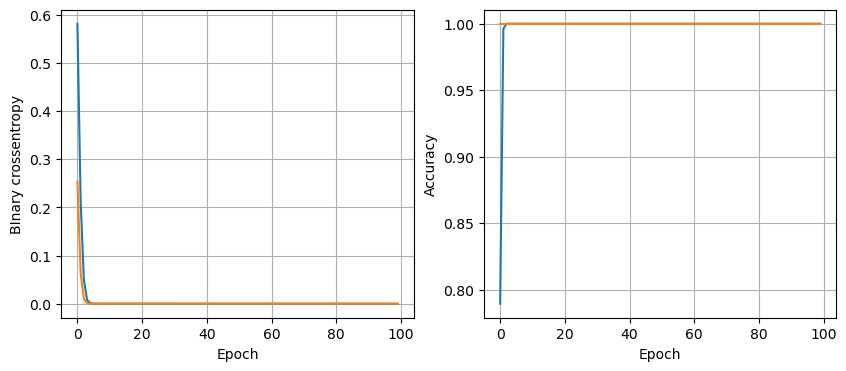

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 1.8606e-06 
64 nodes, dropout 0, lr 0.005, batch size 32


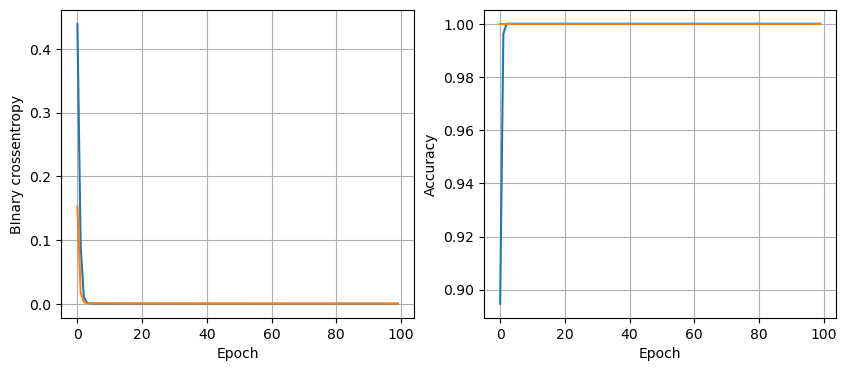

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 1.6499e-05 
64 nodes, dropout 0, lr 0.005, batch size 64


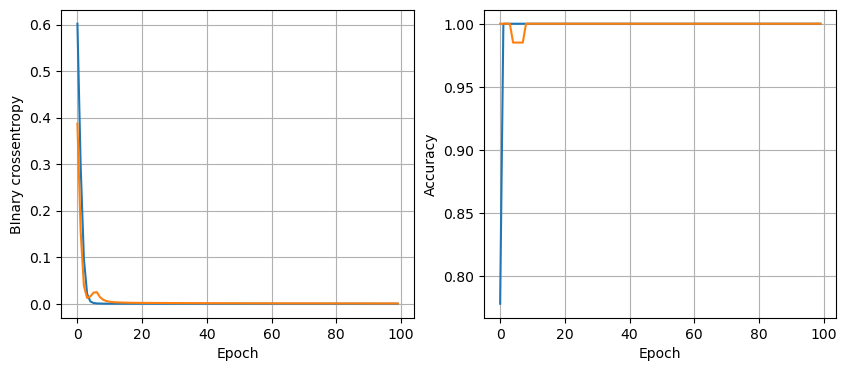

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.6877e-05 
64 nodes, dropout 0, lr 0.005, batch size 128


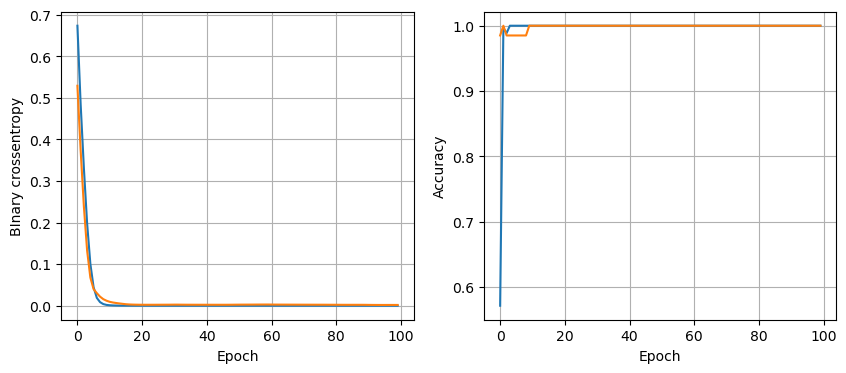

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 1.3021e-04 
64 nodes, dropout 0, lr 0.001, batch size 32


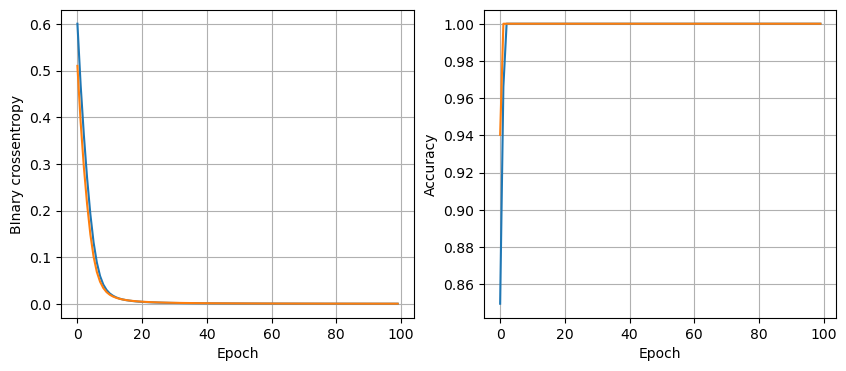

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 1.6331e-04 
64 nodes, dropout 0, lr 0.001, batch size 64


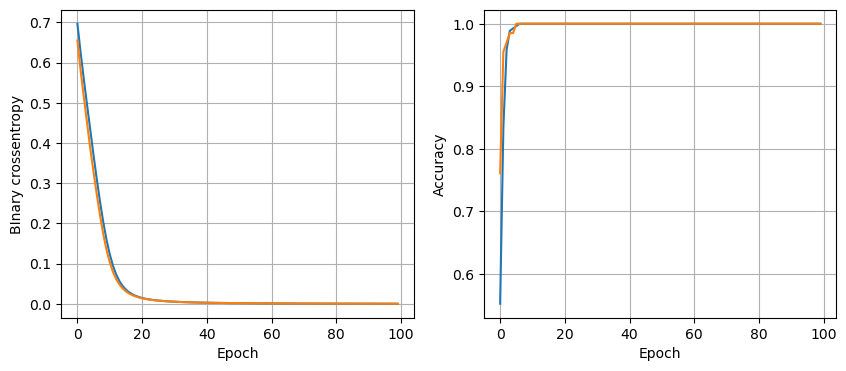

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 3.8291e-04 
64 nodes, dropout 0, lr 0.001, batch size 128


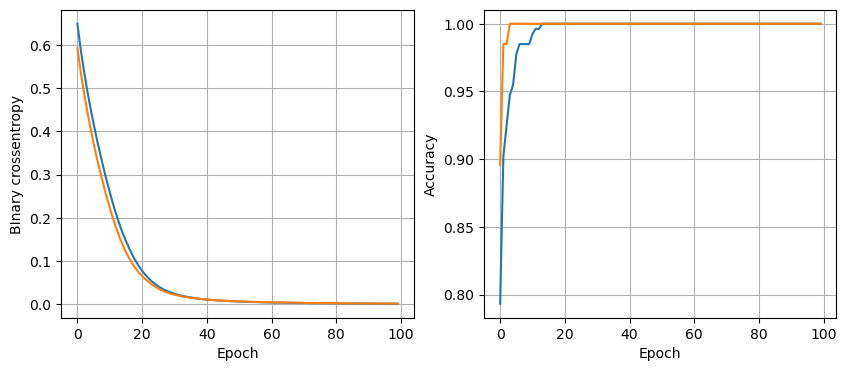

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0015 
64 nodes, dropout 0.2, lr 0.01, batch size 32


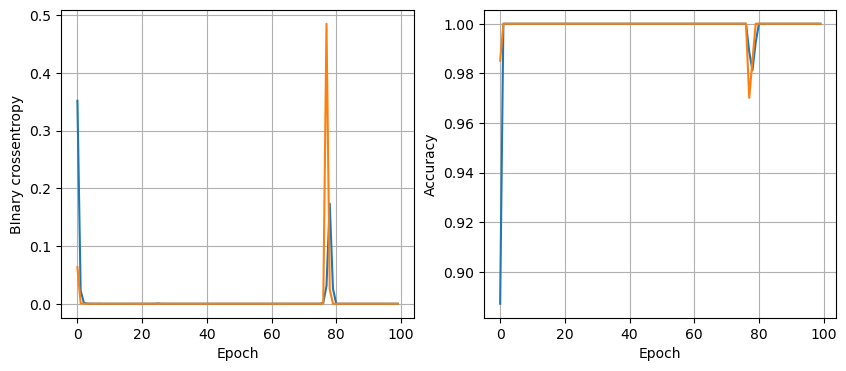

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 4.8295e-08 
64 nodes, dropout 0.2, lr 0.01, batch size 64


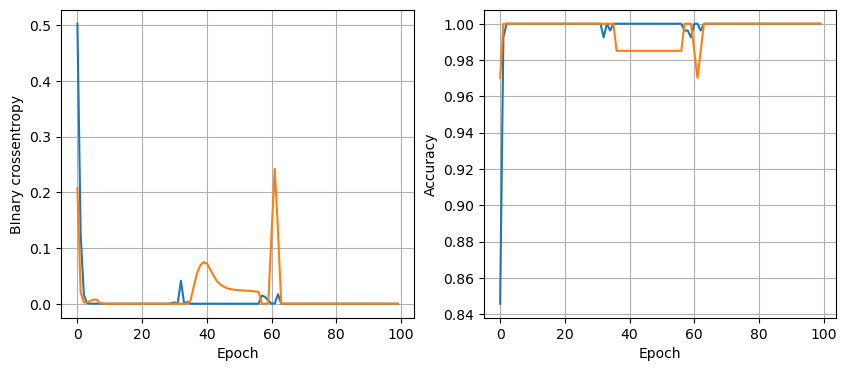

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 9.7084e-09 
64 nodes, dropout 0.2, lr 0.01, batch size 128


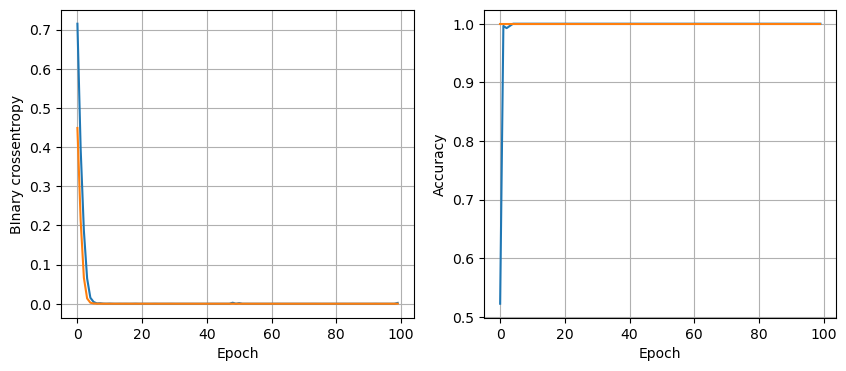

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 1.1836e-06 
64 nodes, dropout 0.2, lr 0.005, batch size 32


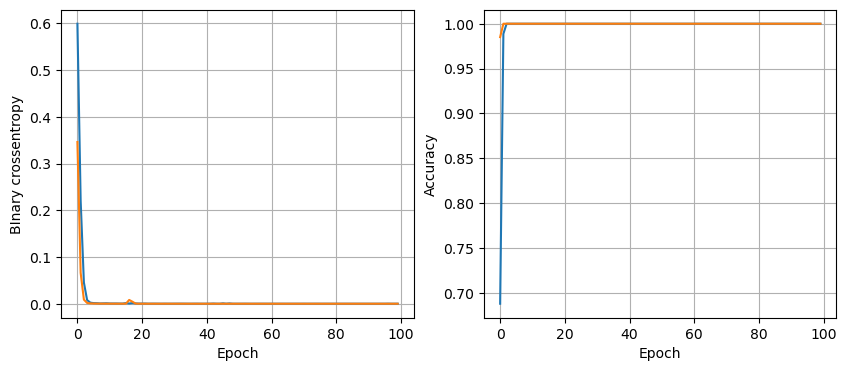

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 1.5749e-06 
64 nodes, dropout 0.2, lr 0.005, batch size 64


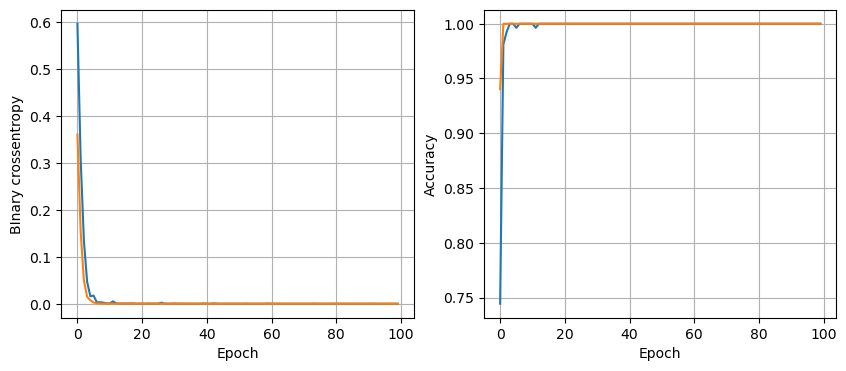

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 1.9983e-06 
64 nodes, dropout 0.2, lr 0.005, batch size 128


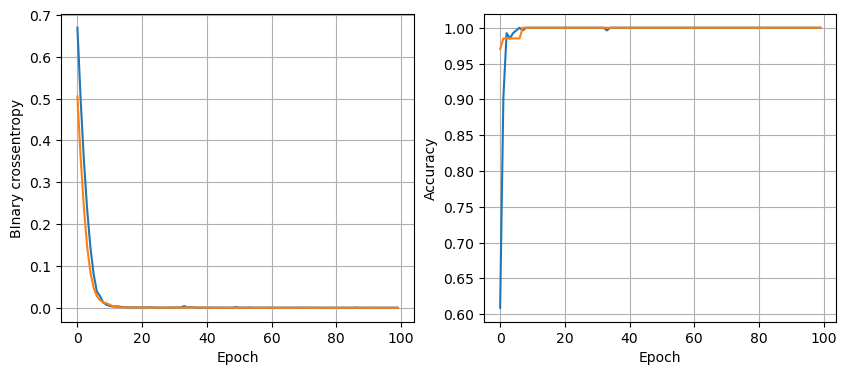

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 1.0578e-05 
64 nodes, dropout 0.2, lr 0.001, batch size 32


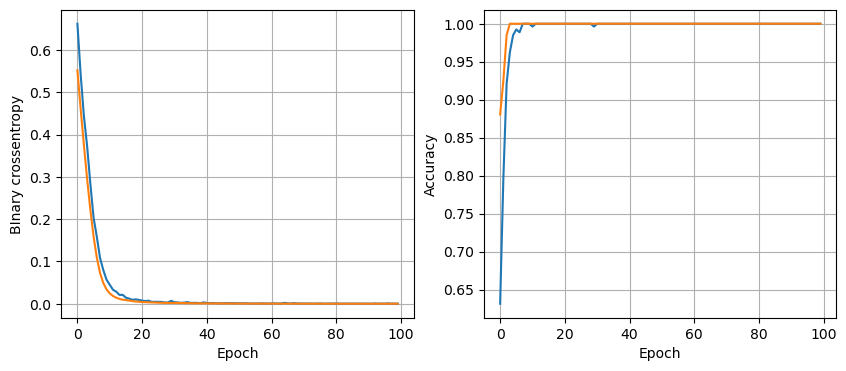

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 5.1768e-05 
64 nodes, dropout 0.2, lr 0.001, batch size 64


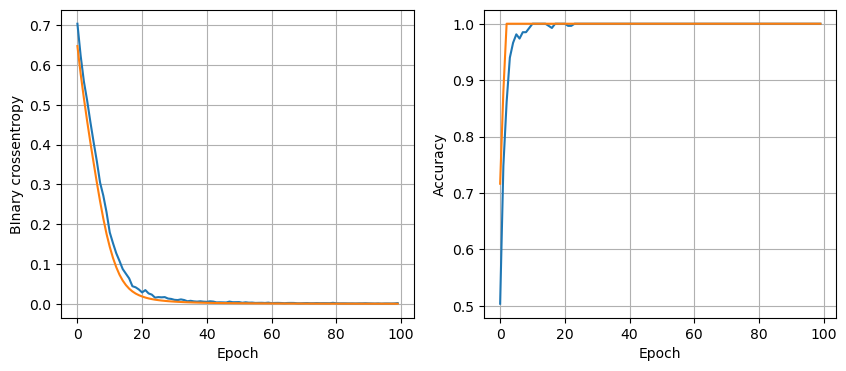

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 2.2171e-04 
64 nodes, dropout 0.2, lr 0.001, batch size 128


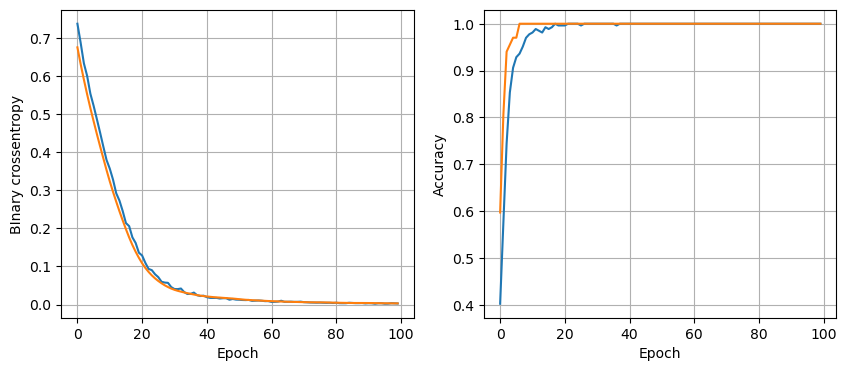

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0012 


In [56]:
least_val_loss = float('inf')
least_loss_model = None
epochs=100
for num_nodes in [16, 32, 64]:
    for dropout_prob in[0, 0.2]:
        for lr in [0.01, 0.005, 0.001]:
            for batch_size in [32, 64, 128]:
                print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
                model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
                plot_history(history)
                val_loss = model.evaluate(X_train, y_train)
                val_loss = val_loss[0]
                if val_loss < least_val_loss:
                    least_val_loss = val_loss
                    least_loss_model = model
                

In [60]:
# Predictions
y_pred = least_loss_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  


In [62]:
# Evaluate the model
print("Neaural Net Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Neaural Net Accuracy: 1.0
Confusion Matrix:
 [[50  0]
 [ 0 34]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84

